In [18]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import yfinance as yf
from sklearn.linear_model import LinearRegression

In [3]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]["Symbol"]
tickers

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

In [4]:
def calc_macd(data, len1, len2, len3):
    shortEMA = data.ewm(span=len1, adjust=False).mean()
    longEMA = data.ewm(span=len2, adjust=False).mean()
    MACD = shortEMA - longEMA
    signal = MACD.ewm(span=len3, adjust=False).mean()
    return MACD, signal

In [5]:
def calc_rsi(data, period):
    delta = data.diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    ema_up = up.ewm(com=period, adjust=False).mean()
    ema_down = down.ewm(com=period, adjust=False).mean()
    rs = ema_up / ema_down
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [6]:
def calc_bollinger(data, period):
    mean = data.rolling(period).mean()
    std = data.rolling(period).std()
    upper_band = np.array(mean) + 2*np.array(std)
    lower_band = np.array(mean) - 2*np.array(std)
    
    return upper_band, lower_band

In [22]:
def test_it(opens, closes, preds, start_account = 1000, thresh = 0):
    account = start_account
    changes = []

    for i in range(len(preds)):
        if (preds[i]-opens[i])/opens[i] >= thresh:
            account += account * (closes[i]-opens[i])/opens[i]
        changes.append(account)
    changes = np.array(changes)

    plt.plot(range(len(changes)), changes)
    plt.show()

    invest_total = start_account + start_account * (closes[-1]-opens[0])/opens[0]
    print("Invested Bal: " + str(invest_total) + "   |   " + str(round((invest_total-start_account)/start_account*100, 1)) + "%")
    print("Algo Bal: " + str(account) + "   |   " + str(round((account-start_account)/start_account*100, 1)) + "%")

[*********************100%***********************]  1 of 1 completed
MMM


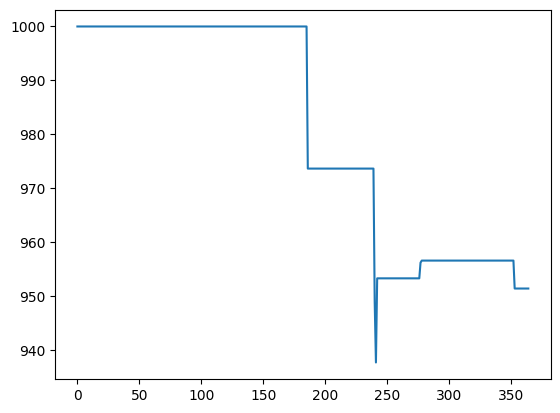

Invested Bal: 565.5954110107461   |   -43.4%
Algo Bal: 951.3710776313466   |   -4.9%
[*********************100%***********************]  1 of 1 completed
AOS


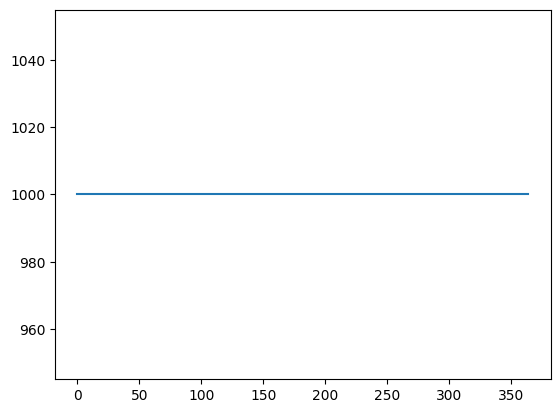

Invested Bal: 1058.5098565793505   |   5.9%
Algo Bal: 1000   |   0.0%
[*********************100%***********************]  1 of 1 completed
ABT


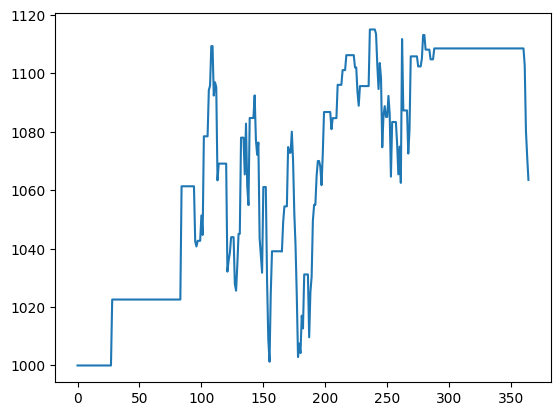

Invested Bal: 828.7084138006074   |   -17.1%
Algo Bal: 1063.5550031243674   |   6.4%
[*********************100%***********************]  1 of 1 completed
ABBV


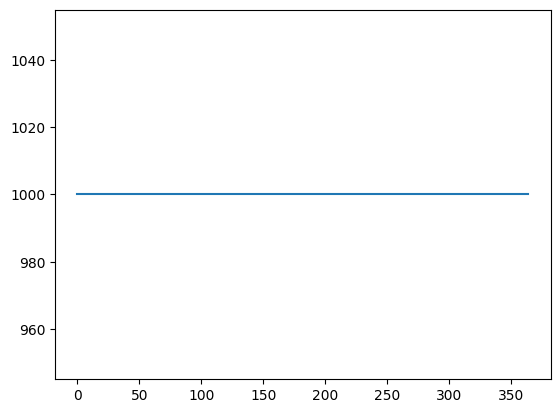

Invested Bal: 1408.8828791491296   |   40.9%
Algo Bal: 1000   |   0.0%
[*********************100%***********************]  1 of 1 completed
ACN


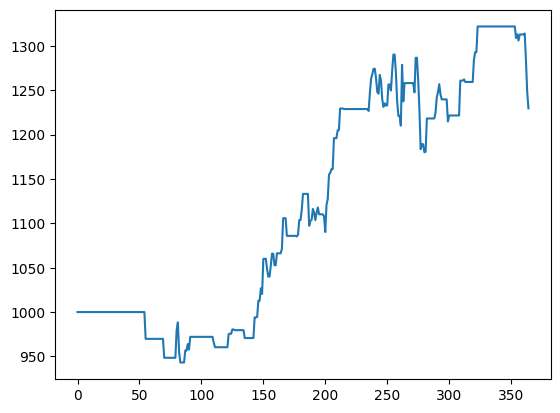

Invested Bal: 773.7664884245503   |   -22.6%
Algo Bal: 1229.5865374595733   |   23.0%
[*********************100%***********************]  1 of 1 completed
ATVI


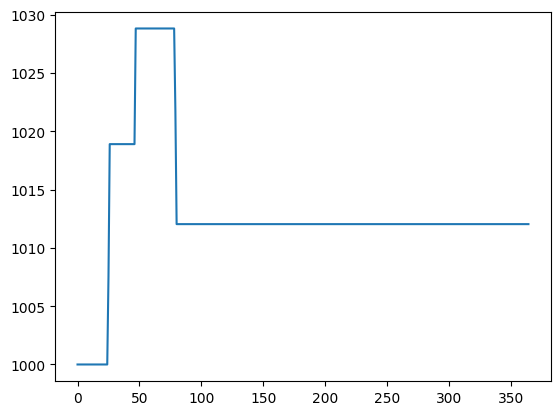

Invested Bal: 1033.4509029064075   |   3.3%
Algo Bal: 1012.036201033368   |   1.2%
[*********************100%***********************]  1 of 1 completed
ADM


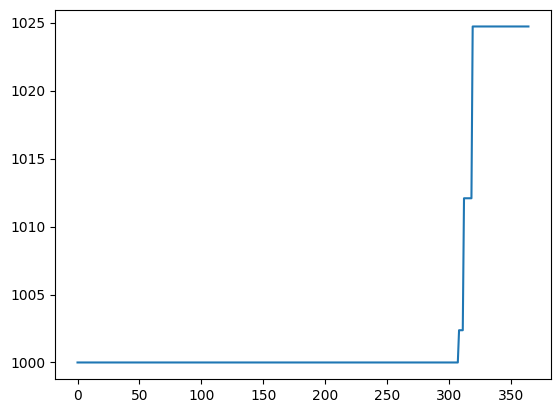

Invested Bal: 1293.8380261548696   |   29.4%
Algo Bal: 1024.7185914823147   |   2.5%
[*********************100%***********************]  1 of 1 completed
ADBE


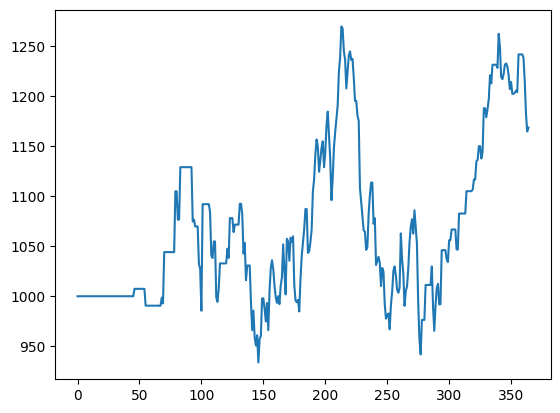

Invested Bal: 574.073398599799   |   -42.6%
Algo Bal: 1168.5929346387172   |   16.9%
[*********************100%***********************]  1 of 1 completed
ADP


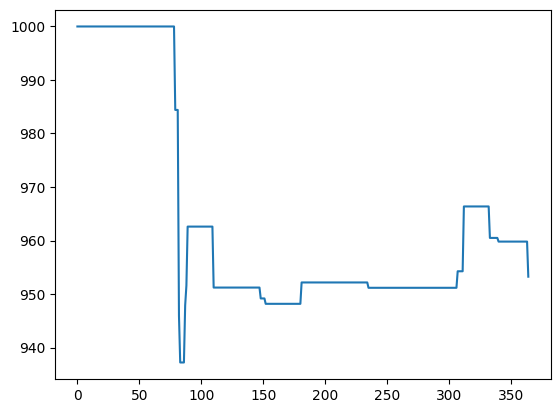

Invested Bal: 1078.6829062333861   |   7.9%
Algo Bal: 953.2364031236365   |   -4.7%
[*********************100%***********************]  1 of 1 completed
AAP


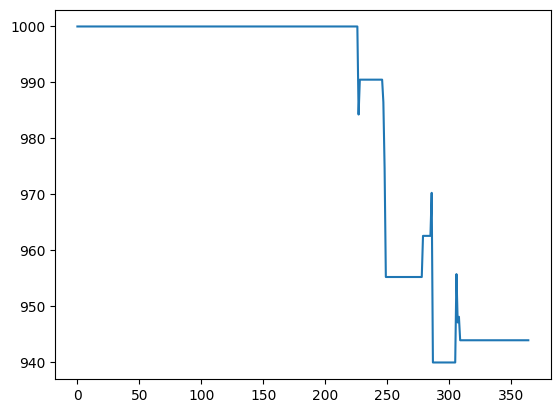

Invested Bal: 563.0870041123117   |   -43.7%
Algo Bal: 943.8499448626869   |   -5.6%


'\n\n    x = history.index.values\n    plt.figure(figsize=(15,10))\n    plt.plot(x, history["Prev_Close"], color = \'blue\')\n    #plt.plot(x, history["5SMA"], color = \'orange\')\n    #plt.plot(x, history["10SMA"], color = \'green\')\n    #plt.plot(x, history["20SMA"], color = \'pink\')\n    plt.plot(x, history["50SMA"], color = \'purple\')\n    plt.plot(x, history["100SMA"], color = \'yellow\')\n    plt.plot(x, history["200SMA"], color = \'red\')\n    plt.plot(x, history["Upper_Band"], color = \'orange\')\n    plt.plot(x, history["Lower_Band"], color = \'orange\')\n    plt.legend()\n    plt.show()\n\n    colors = np.array([\'green\']*len(history[\'MACD\']))\n    colors[history[\'MACD\'] < 0] = \'red\'\n    plt.figure(figsize=(15,3))\n    plt.bar(x, history["MACD"], color = colors)\n    plt.plot(x, history["MACD_signal"], color = \'blue\')\n    plt.show()\n\n    plt.figure(figsize=(15,3))\n    plt.plot(x, history["RSI"], color = \'purple\')\n    plt.plot([x[0], x[-1]], [80, 80], color

In [25]:
for ticker in tickers[0:10]:
    end_date = datetime.now()
    start_date = end_date - timedelta(days=15*365)

    history = yf.download(ticker, start=start_date, end=end_date, interval="1d", prepost=False)
    history = history.loc[:, ["Open", "Close", "Volume"]]

    history["Prev_Close"] = history.loc[:, "Close"].shift(1)
    history["Prev_Volume"] = history.loc[:, "Volume"].shift(1)

    datetimes = history.index.values
    weekdays = []

    for dt in datetimes:
        dt = datetime.strptime(str(dt), '%Y-%m-%dT%H:%M:%S.000000000')
        weekdays.append(dt.weekday())

    history["Weekday"] = weekdays

    history["5SMA"] = history["Prev_Close"].rolling(window=5).mean()
    history["10SMA"] = history["Prev_Close"].rolling(window=10).mean()
    history["20SMA"] = history["Prev_Close"].rolling(window=20).mean()
    history["50SMA"] = history["Prev_Close"].rolling(window=50).mean()
    history["100SMA"] = history["Prev_Close"].rolling(window=100).mean()
    history["200SMA"] = history["Prev_Close"].rolling(window=200).mean()

    MACD, signal = calc_macd(history["Prev_Close"], 12, 26, 9)
    history["MACD"] = MACD
    history["MACD_signal"] = signal

    history["RSI"] = calc_rsi(history["Prev_Close"], 13)
    history["RSI"] = calc_rsi(history["Prev_Volume"], 13)

    upper, lower = calc_bollinger(history["Prev_Close"], 20)
    history["Upper_Band"] = upper
    history["Lower_Band"] = lower



    labels = ['Prev_Close',	'Prev_Volume', '5SMA', '10SMA', '20SMA',	'50SMA', '100SMA', '200SMA', 'MACD', 'MACD_signal',	'RSI', 'Upper_Band', 'Lower_Band']

    period = 1
    new_labels = [str(period) + 'd_' + label for label in labels]
    history[new_labels] = history[labels].pct_change(period, fill_method='ffill')

    period = 2
    new_labels = [str(period) + 'd_' + label for label in labels]
    history[new_labels] = history[labels].pct_change(period, fill_method='ffill')

    period = 5
    new_labels = [str(period) + 'd_' + label for label in labels]
    history[new_labels] = history[labels].pct_change(period, fill_method='ffill')

    period = 10
    new_labels = [str(period) + 'd_' + label for label in labels]
    history[new_labels] = history[labels].pct_change(period, fill_method='ffill')

    history = history.replace([np.inf, -np.inf], np.nan).dropna()

    y = history['Close']
    X = history.drop(['Close', 'Volume'], axis=1).values

    num_test = 365
    X_train = X[:-num_test]
    X_test = X[-num_test:]
    y_train = y[:-num_test]
    y_test = y[-num_test:]

    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(ticker)

    test_it(X_test.T[0], y_test, preds, 1000, 0.005)


'''

    x = history.index.values
    plt.figure(figsize=(15,10))
    plt.plot(x, history["Prev_Close"], color = 'blue')
    #plt.plot(x, history["5SMA"], color = 'orange')
    #plt.plot(x, history["10SMA"], color = 'green')
    #plt.plot(x, history["20SMA"], color = 'pink')
    plt.plot(x, history["50SMA"], color = 'purple')
    plt.plot(x, history["100SMA"], color = 'yellow')
    plt.plot(x, history["200SMA"], color = 'red')
    plt.plot(x, history["Upper_Band"], color = 'orange')
    plt.plot(x, history["Lower_Band"], color = 'orange')
    plt.legend()
    plt.show()

    colors = np.array(['green']*len(history['MACD']))
    colors[history['MACD'] < 0] = 'red'
    plt.figure(figsize=(15,3))
    plt.bar(x, history["MACD"], color = colors)
    plt.plot(x, history["MACD_signal"], color = 'blue')
    plt.show()

    plt.figure(figsize=(15,3))
    plt.plot(x, history["RSI"], color = 'purple')
    plt.plot([x[0], x[-1]], [80, 80], color = 'red')
    plt.plot([x[0], x[-1]], [20, 20], color = 'green')
    plt.show()
'''
